1- READING THE DATA

In [182]:
import pandas as pd

csvs=['Trader_Jibon.csv',
      'cryptocevo.csv',
      'WhalePanda.csv',
      'KoroushAK.csv',
      'Tradermayne.csv',
      'AltcoinGordon.csv',
      'CryptoWizardd.csv',
      'MartiniGuyYT.csv',
      'adam3us.csv',
      'rovercrc.csv',
      'rogerkver.csv',
      'SatoshiLite.csv',
      'AltcoinDailyio.csv',
      'VitalikButerin.csv',
      'cz_binance.csv']

In [183]:
def process_csv(file_path):
    df = pd.read_csv(file_path)  # Read CSV file
    df = df.iloc[1:]  # Remove column names (assuming they are in the first row)
    return df

In [184]:
# Iterate through CSV files, process them, and concatenate vertically
dfs = [process_csv(file) for file in csvs]
combined_df = pd.concat(dfs, ignore_index=True)

# Add column names to the combined dataframe
column_names = [
    "index", "username", "text", "date", "is_retweet", "likes", "retweets", "comments"
]
combined_df.columns = column_names

# csv combined dataframe
output_path = "influencers_tweets.csv"
combined_df.to_csv(output_path, index=False)

print(f"Combined data saved to: {output_path}")

Combined data saved to: influencers_tweets.csv


2- DATA PREPROCESSING

In [185]:
# prompt: google drive

from google.colab import drive
drive.mount('/content/drive')

# Save the combined dataframe to Google Drive
output_path = "/content/drive/MyDrive/influencers_tweets.csv"
twt_data=pd.read_csv(output_path)
twt_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,username,text,date,is_retweet,likes,retweets,comments
0,1,Trader_J,"Good to see Rover buying $NIPPY. I got a bag,...",5/1/2024 20:05,False,31,12,38
1,2,Trader_J,NaN,5/1/2024 13:29,False,32,4,8
2,3,Trader_J,$BTC Sub 59K as Expected. Now Run It Back or B...,5/1/2024 13:29,False,323,30,14
3,4,Trader_J,"Sub 59K, Then 75K $BTC",4/30/2024 8:28,True,1026,122,84
4,5,Trader_J,Exciting times ahead! May is gearing up to be ...,4/29/2024 13:25,False,7,2,13


In [186]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       7433 non-null   int64 
 1   username    7433 non-null   object
 2   text        7317 non-null   object
 3   date        7433 non-null   object
 4   is_retweet  7433 non-null   bool  
 5   likes       7433 non-null   int64 
 6   retweets    7433 non-null   int64 
 7   comments    7433 non-null   int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 413.9+ KB


In [187]:
# prompt: how many NaNs rows are there

nan_rows = twt_data.isnull().sum()
print(f"Number of NaN rows: {nan_rows.sum()}")


Number of NaN rows: 116


In [188]:
# prompt: drop these NaN rows

twt_data.dropna(inplace=True)


In [189]:
# prompt: drop the "index" column

twt_data.drop(columns=["index"], inplace=True)


In [190]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 0 to 7432
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    7317 non-null   object
 1   text        7317 non-null   object
 2   date        7317 non-null   object
 3   is_retweet  7317 non-null   bool  
 4   likes       7317 non-null   int64 
 5   retweets    7317 non-null   int64 
 6   comments    7317 non-null   int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 407.3+ KB


In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9410 (\N{CIRCLED LATIN CAPITAL LETTER M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


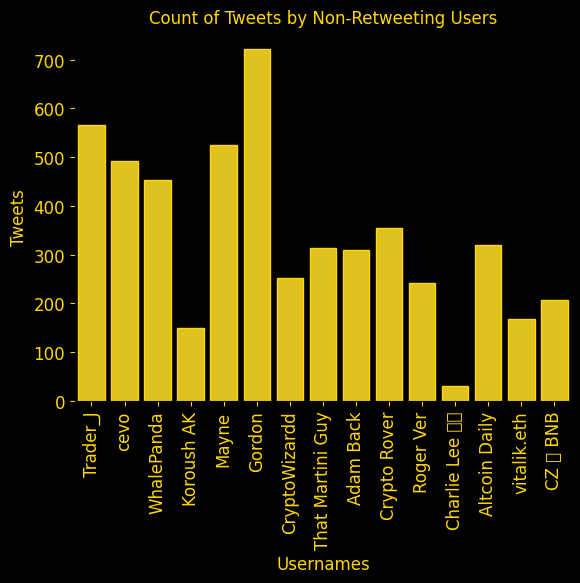

In [192]:
plt.figure(facecolor='black')

# Create a countplot of username for non-retweeted tweets
ax = sns.countplot(x="username", data=twt_data[twt_data["is_retweet"] == False], color = "gold", edgecolor = "gold")

plt.gca().set_facecolor('black')

ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xlabel('Usernames', color='gold', fontsize='large')
plt.ylabel('Tweets', color='gold', fontsize='large')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and show the plot
plt.title("Count of Tweets by Non-Retweeting Users", color='gold', fontsize='large')
plt.show()


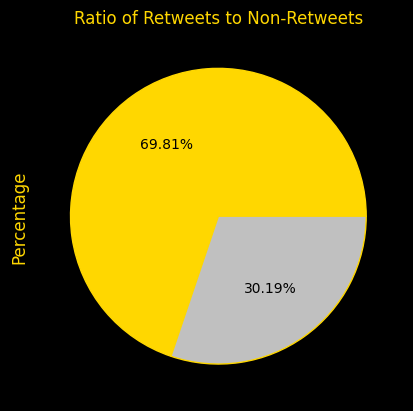

In [193]:
# prompt: pie chart for is_retweet column with similar colors as before

import matplotlib.pyplot as plt
plt.figure(facecolor='black')

# Create a pie chart of is_retweet column
ax = twt_data['is_retweet'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['gold', 'silver'], wedgeprops={'edgecolor': 'gold', 'linewidth': 1})

plt.gca().set_facecolor('black')

ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.ylabel('Percentage', color='gold', fontsize='large')

# Add a title and show the plot
plt.title("Ratio of Retweets to Non-Retweets", color='gold', fontsize='large')
plt.show()


In [194]:
twt_data.describe()

,likes,retweets,comments
count,7317.000000,7317.000000,7317.000000
mean,1239.224819,261.377614,198.432144
std,10923.079491,3293.035392,957.339364
min,0.000000,0.000000,0.000000
25%,106.000000,11.000000,20.000000
50%,286.000000,32.000000,55.000000
75%,724.000000,94.000000,139.000000
max,721300.000000,224638.000000,38387.000000


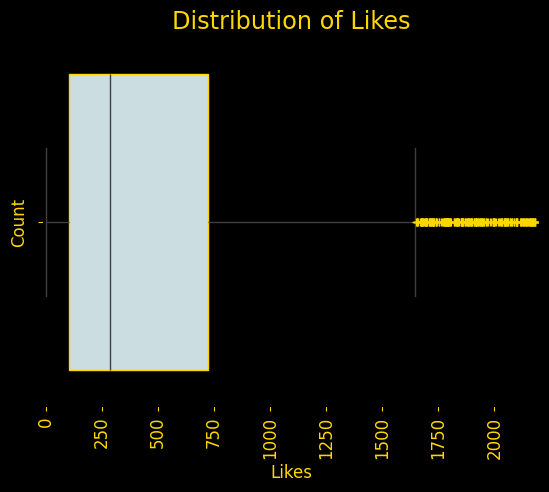

In [195]:

plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['likes'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Likes', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 2200])

# Add a title and show the plot
plt.title("Distribution of Likes", color='gold', fontsize='xx-large')
plt.show()

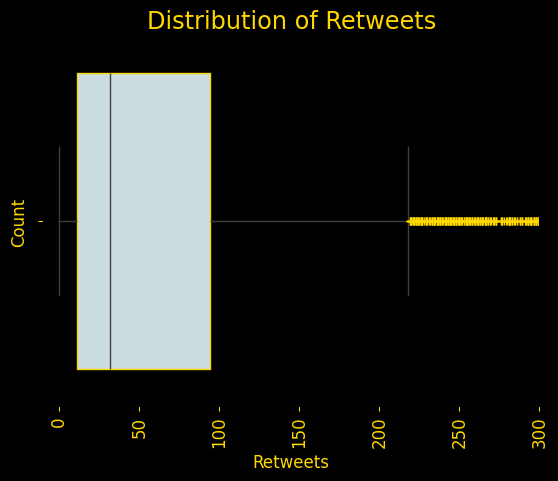

In [196]:

plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['retweets'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Retweets', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 300])

# Add a title and show the plot
plt.title("Distribution of Retweets", color='gold', fontsize='xx-large')
plt.show()

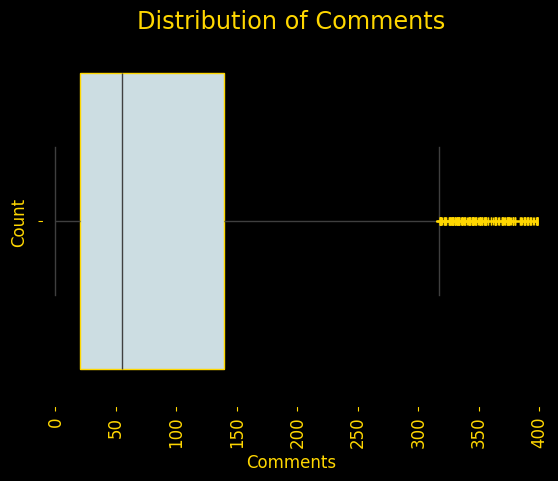

In [197]:

plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['comments'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Comments', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 400])

# Add a title and show the plot
plt.title("Distribution of Comments", color='gold', fontsize='xx-large')
plt.show()

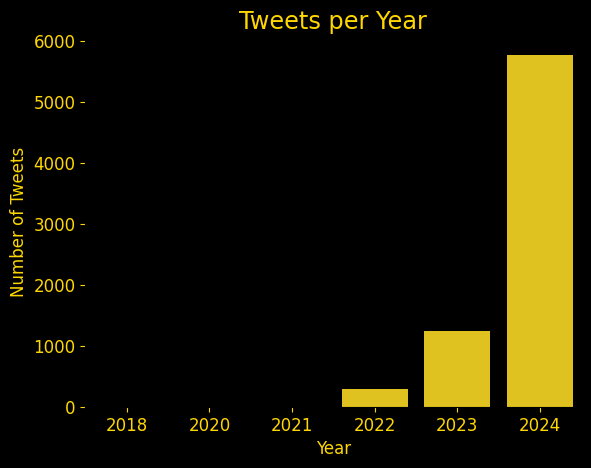

In [198]:

# Extract year from date
twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year

# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [199]:
# prompt: drop the rows with dates before 2024

twt_data = twt_data[twt_data['year'] >= 2024]


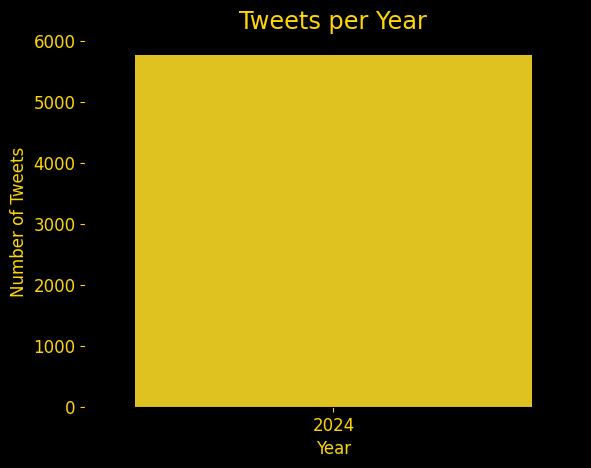

In [200]:

# Extract year from date
twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year

# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [201]:
twt_data = twt_data[twt_data['date'] > '2024-04-30']

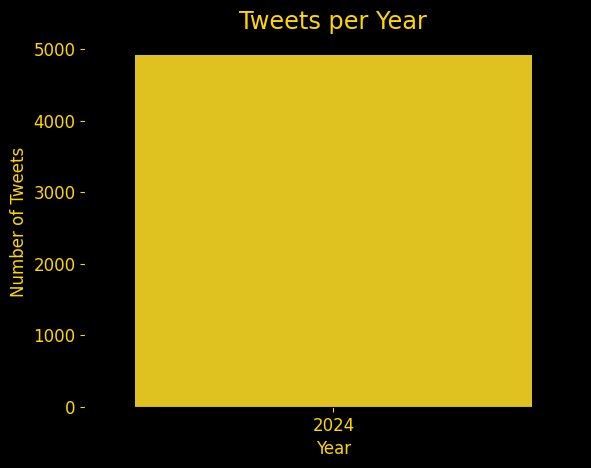

In [202]:

# Extract year from date
twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year

# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [203]:
twt_data.describe()

,likes,retweets,comments,year
count,4921.000000,4921.000000,4921.000000,4921.0
mean,907.887828,181.793131,157.173745,2024.0
std,10528.051569,3345.445351,584.182704,0.0
min,1.000000,0.000000,0.000000,2024.0
25%,125.000000,11.000000,26.000000,2024.0
50%,315.000000,30.000000,67.000000,2024.0
75%,717.000000,80.000000,144.000000,2024.0
max,721300.000000,224638.000000,28182.000000,2024.0


In [207]:
# prompt: drop the rows if they have likes less than 15 or retweets less than 15

twt_data = twt_data[((twt_data['likes'] >= 1) & (twt_data['retweets'] >= 1))]


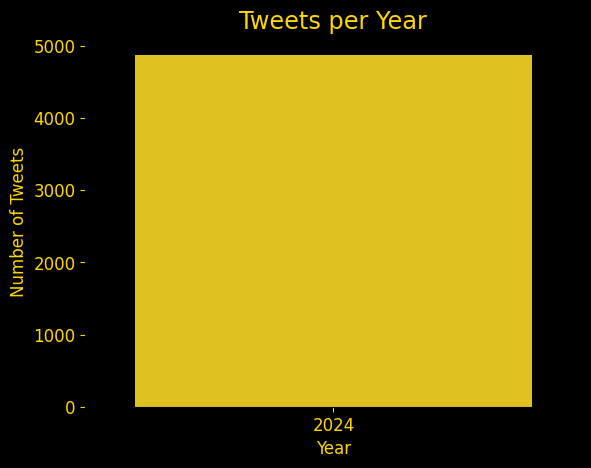

In [208]:
# prompt: Visualize the dates by year

# Extract year from date
twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year

# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [209]:
twt_data.describe()

,likes,retweets,comments,year
count,4877.000000,4877.000000,4877.000000,4877.0
mean,915.758868,183.433258,158.519377,2024.0
std,10575.117892,3360.460977,586.638914,0.0
min,1.000000,1.000000,0.000000,2024.0
25%,129.000000,11.000000,27.000000,2024.0
50%,319.000000,31.000000,68.000000,2024.0
75%,719.000000,82.000000,145.000000,2024.0
max,721300.000000,224638.000000,28182.000000,2024.0


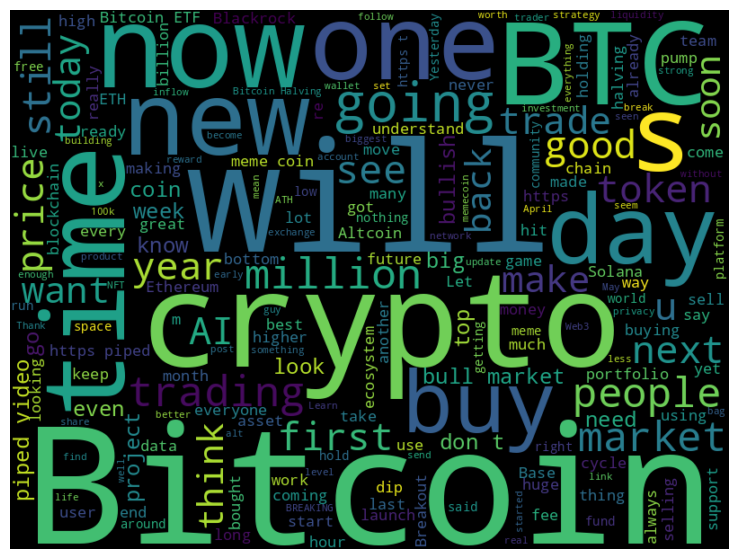

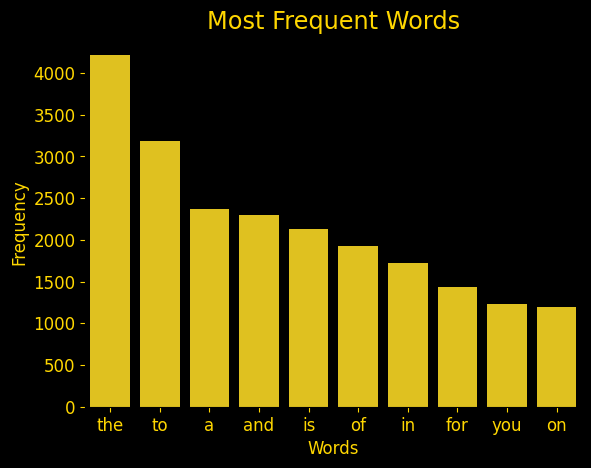

In [210]:

from wordcloud import WordCloud
text = " ".join(twt_data["text"].tolist())
wordcloud = WordCloud(width=800, height=600, background_color="black").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a bar chart of the most frequent words
from collections import Counter
word_counts = Counter(text.split())
most_frequent_words = word_counts.most_common(10)
words, counts = zip(*most_frequent_words)

plt.figure(facecolor="black")
ax = sns.barplot(x=words, y=counts, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Words", color="gold", fontsize="large")
plt.ylabel("Frequency", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Most Frequent Words", color="gold", fontsize="xx-large")
plt.show()

